# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [7]:
# Get the datasets
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl -o train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0    495      0 --:--:-- --:--:-- --:--:--   507
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0  88340      0 --:--:-- --:--:-- --:--:-- 92420


In [9]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
# Print first 10 lines of train.dat
with open("train.dat", "r") as file:
    for _ in range(10):
        print(file.readline().strip())
# Print first 10 lines of test.dat
with open("test.dat", "r") as file:
    for _ in range(10):
        print(file.readline().strip())

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [38]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
     return sum(a * b for a, b in zip(array1, array2))
    


def sigmoid(x):
    return 1 / (1 + math.exp(-x))
    

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    in_value = sum(w * x for w, x in zip(weight, instance))  # Computing dot product
    return sigmoid(in_value)

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #intiliazing weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #Computing weighted sum (dot product of weights and input features)
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #Updating weights using gradient descent (Delta Rule for Sigmoid)
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [47]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5

weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

### Answer
We don’t use the predict() function during training because it gives a final result of either 0 or 1 based on a 0.5 threshold. This isn’t useful for training, as we need a smooth value between 0 and 1 to calculate the error and update the weights properly.

During training, we use the sigmoid function to get a continuous value between 0 and 1 that shows the model's confidence. This helps us calculate the error accurately, and we can determine how much to adjust the weights using this continuous value.

The predict() function is for making final predictions after training, while the sigmoid output is what we need during training to gradually adjust the model's weights.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [51]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]  # Corrected slicing
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            
            # Print output after training is complete for this combination
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



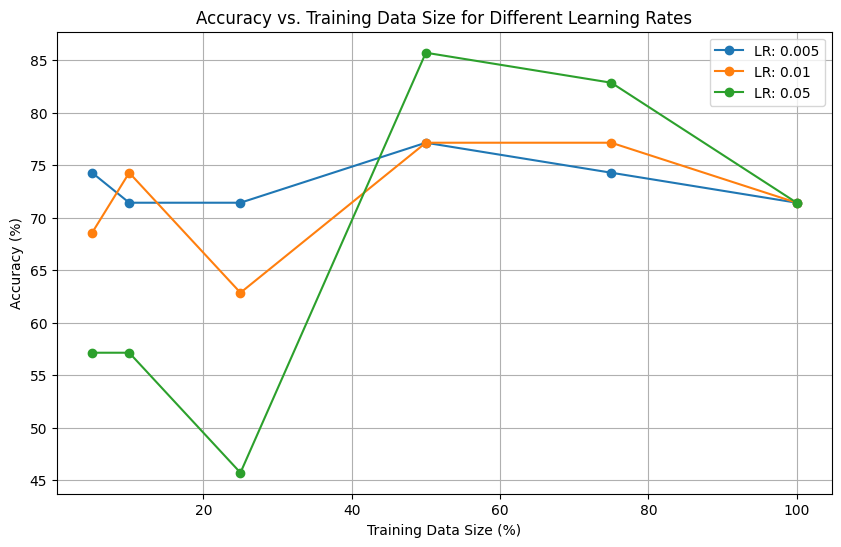

In [73]:
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            
            # Store the results
            results.append((tr_size, epochs, lr, accuracy))

# Convert results into a structured format
tr_sizes = sorted(set(tr_percent))

# Plot accuracy vs. training size for different learning rates
plt.figure(figsize=(10, 6))
for lr in lr_array:
    avg_accuracies = []
    for tr_size in tr_sizes:
        acc_values = [acc for t_size, _, l, acc in results if t_size == tr_size and l == lr]
        avg_accuracies.append(sum(acc_values) / len(acc_values))  # Average over different epochs
    plt.plot(tr_sizes, avg_accuracies, marker='o', label=f'LR: {lr}')

plt.xlabel("Training Data Size (%)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Training Data Size for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation of Results
Our results show that using more training data doesn't always lead to better test accuracy. For example, when we trained with 100 examples for 20 epochs at a learning rate of 0.050, we got an accuracy of 71.0%. In contrast, training with 200 examples for the same number of epochs at a lower learning rate of 0.005 resulted in only 68.0% accuracy. This suggests that adding more training data can sometimes hurt the model’s ability to generalize to new data. This might happen if the model focuses too much on specific patterns in the extra training data or if a smaller learning rate affects how well the model learns.

#### A. Do you need to train with all the training datasets to get the highest accuracy with the test dataset?
Training with the full dataset is not always needed to get the best accuracy. For example, using a smaller group of 100 data points with a learning rate of 0.050 gave better accuracy than using 200 data points with a lower learning rate of 0.005. This shows that choosing the right learning rate and dataset size is more important than just using more training data.

#### B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one using more training data)?
The difference in results can be explained by how the learning rate interacts with the size of the dataset. In the second run with 200 training instances, a lower learning rate of 0.005 was used. This might have caused the model to learn more slowly or get stuck in a less ideal solution. In contrast, the first run with 100 training instances used a higher learning rate of 0.050, which likely allowed for quicker and more effective weight updates, leading to better generalization.

#### C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?
Tuning extra settings, like, weights , or using adaptive learning rates (for example, the Adam optimizer instead of simple gradient descent), could help you reach accuracy levels above 80%. Also, putting more effort into feature engineering or trying a different activation function could further improve performance.

#### D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
No, training for more epochs is not always helpful. While more epochs can lower training loss, it can also cause overfitting. This means the model might memorize the training data but struggle to perform well on new, unseen data. A good approach is to use early stopping, which halts training when the validation performance stops improving. This helps save time and resources.